In [93]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from math import pi, sqrt, atan, atan2, cos, sin
import math
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
from matplotlib import rcParams
import struct
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
%matplotlib inline

In [124]:
f = open("../figures/part_5_perspectives/holo/holo_phase_num_50.bin", "r")
a = np.fromfile(f, dtype=np.int8,count=2)
print(a)

a = np.fromfile(f, dtype=np.int32,count=3)
print(a)

a = np.fromfile(f, dtype=np.float32,count=2)
print(a)
px_size = a[0]
h_conv = a[1]

a = np.fromfile(f, dtype=np.int8,count=1)
print(a)

img = np.fromfile(f, dtype=np.float32,count=800*800)
img = img.reshape((800, 800))
f.close()

[1 0]
[ 23 800 800]
[6.1071364e-07 5.3714388e-08]
[1]


In [89]:
phase_height = img * h_conv * 1e9

print(np.min(phase_height), np.max(phase_height))

-168.74861 168.7475


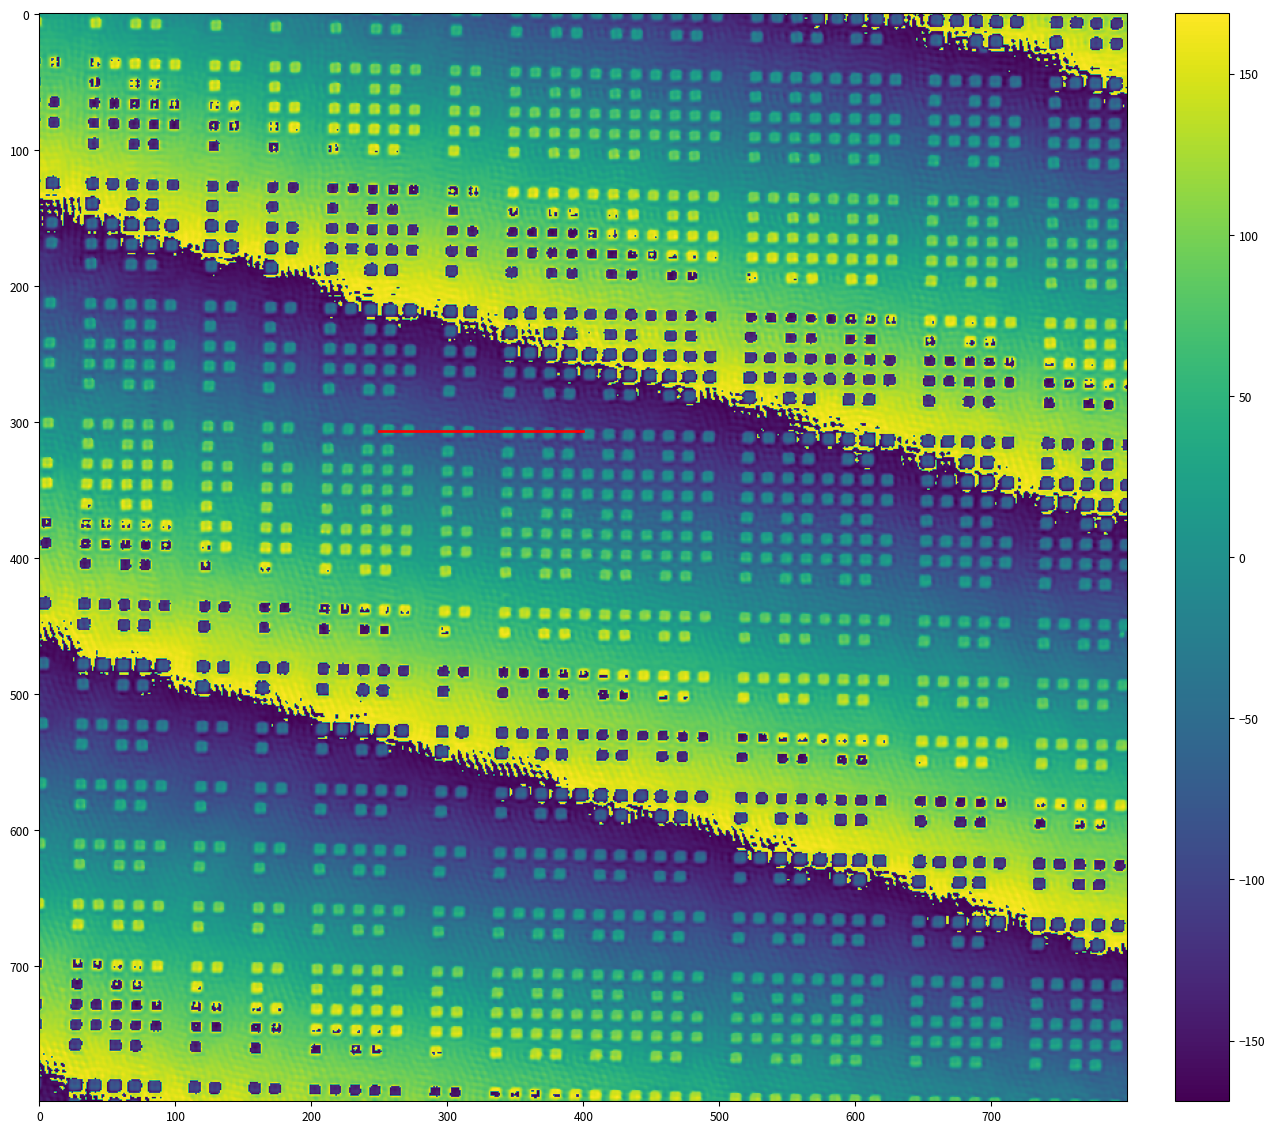

In [103]:
fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.family':'Source Sans Pro'})

# cmapCb = mpl.cm.viridis

ax1 = plt.subplot(111)
im_fig = plt.imshow(phase_height)
# cbar = plt.colorbar(im_fig, ax=ax1, cmap=cmapCb)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im_fig, cax=cax)
ax1.plot([250, 400], [307, 307], linewidth=2, color='red')

(array([-150., -125., -100.,  -75.,  -50.,  -25.,    0.,   25.,   50.,
          75.]),
 <a list of 10 Text major ticklabel objects>)

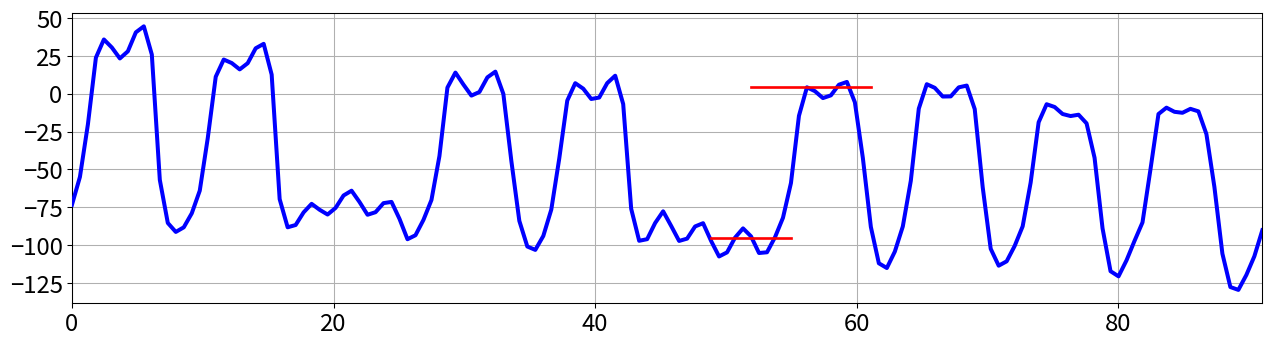

In [141]:
line_height = phase_height[307, 250:400]
x_vec = np.arange(0, np.shape(line_height)[0]) * px_size * 1e6


fig = plt.figure(num=None, figsize=(16, 4), dpi=96, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.family':'Source Sans Pro'})


ax1 = plt.subplot(111)
ax1.plot(x_vec, line_height, linewidth=3, color='blue', zorder=3)
ax1.plot([x_vec[85], x_vec[100]], [line_height[92], line_height[92]], linewidth=2, color='red', zorder=3)
ax1.plot([x_vec[80], x_vec[90]], [line_height[83], line_height[83]], linewidth=2, color='red', zorder=3)

ax1.set_xlim(0, x_vec[-1])

ax1.grid(zorder=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)